Categorical variables encoded successfully!
Numerical features normalized successfully!


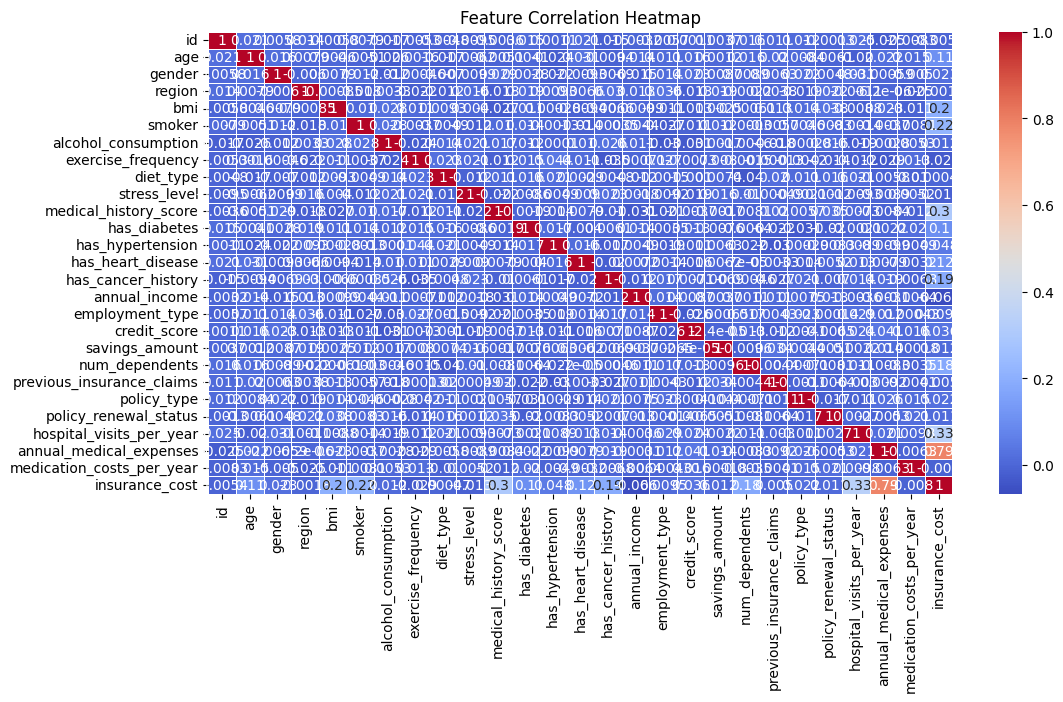

Preprocessed dataset saved successfully!


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("medical_insurance_dummy_data.csv")

# Convert categorical columns to numerical values before correlation
df_numeric = df.copy()

# Encoding categorical variables
categorical_columns = ["gender", "smoker", "region", "alcohol_consumption", "exercise_frequency", 
                        "diet_type", "stress_level", "has_diabetes", "has_hypertension", "has_heart_disease", 
                        "has_cancer_history", "employment_type", "policy_type", "policy_renewal_status"]

# Convert categorical values to numerical
for col in categorical_columns:
    df_numeric[col] = df_numeric[col].astype("category").cat.codes

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("Categorical variables encoded successfully!")

# List of numerical columns to scale
numerical_columns = ["age", "bmi", "annual_income", "medical_history_score", 
                     "credit_score", "savings_amount", "hospital_visits_per_year", 
                     "annual_medical_expenses", "medication_costs_per_year"]

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Numerical features normalized successfully!")

# Generate correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Save the preprocessed dataset
df.to_csv("medical_insurance_preprocessed.csv", index=False)
print("Preprocessed dataset saved successfully!")
